In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drought = pd.read_csv("./한국수자원공사_가뭄대응정보_가뭄 피해정보_20220413.csv",encoding="cp949")
drought.head(5)

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일
0,전라남도,완도군,청산면,제한급수,1200,2007-10-15,2008-04-21
1,전라남도,완도군,보길면,제한급수,1800,2007-12-10,2008-05-28
2,전라남도,완도군,노화읍,제한급수,1500,2007-12-10,2008-05-28
3,경상북도,의성군,사곡면,운반급수,88,2008-01-08,2008-04-08
4,전라남도,완도군,소안면,제한급수,2458,2008-02-12,2008-05-28


In [126]:
#print(drought.info())
#print(drought.isnull().sum())

drought["피해년도"]=pd.to_datetime(drought["피해시작일"]).dt.year
drought.head(5)

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해년도
0,전라남도,완도군,청산면,제한급수,1200,2007-10-15,2008-04-21,2007
1,전라남도,완도군,보길면,제한급수,1800,2007-12-10,2008-05-28,2007
2,전라남도,완도군,노화읍,제한급수,1500,2007-12-10,2008-05-28,2007
3,경상북도,의성군,사곡면,운반급수,88,2008-01-08,2008-04-08,2008
4,전라남도,완도군,소안면,제한급수,2458,2008-02-12,2008-05-28,2008


In [136]:
drought_year = drought.groupby(drought["피해년도"], as_index =False)["피해시작일"].count()
drought_year.rename(columns = {'피해시작일':'피해건수'},inplace=True)
drought_year

,피해년도,피해건수
0,2007,3
1,2008,11
2,2009,57
3,2010,9
4,2011,45
5,2012,59
6,2013,22
7,2014,105
8,2015,216
9,2016,147


<BarContainer object of 14 artists>

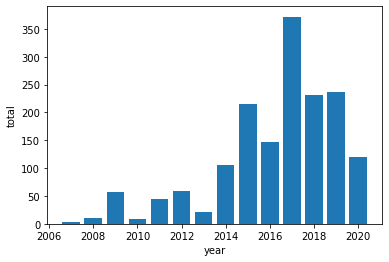

In [137]:
plt.xlabel("year")
plt.ylabel("total")
plt.bar(drought_year["피해년도"],drought_year["피해건수"])

In [92]:
drought= drought.dropna(axis=0)
#print(drought.isnull().sum())
start_date= pd.to_datetime(drought["피해시작일"])
finish_date = pd.to_datetime(drought["피해종료일"])
drought["총피해일"]=finish_date-start_date
drought.head(5)

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해년도,총피해일
0,전라남도,완도군,청산면,제한급수,1200,2007-10-15,2008-04-21,2007,189 days
1,전라남도,완도군,보길면,제한급수,1800,2007-12-10,2008-05-28,2007,170 days
2,전라남도,완도군,노화읍,제한급수,1500,2007-12-10,2008-05-28,2007,170 days
3,경상북도,의성군,사곡면,운반급수,88,2008-01-08,2008-04-08,2008,91 days
4,전라남도,완도군,소안면,제한급수,2458,2008-02-12,2008-05-28,2008,106 days


In [108]:
drought["총피해일"]=drought["총피해일"].astype("str")
def extract_day(row): 
    return row.split(' ')[0]
drought["총피해일"]=drought["총피해일"].apply(extract_day)
drought["총피해일"]=drought["총피해일"].astype("int64")
drought.head(5)

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해년도,총피해일
0,전라남도,완도군,청산면,제한급수,1200,2007-10-15,2008-04-21,2007,189
1,전라남도,완도군,보길면,제한급수,1800,2007-12-10,2008-05-28,2007,170
2,전라남도,완도군,노화읍,제한급수,1500,2007-12-10,2008-05-28,2007,170
3,경상북도,의성군,사곡면,운반급수,88,2008-01-08,2008-04-08,2008,91
4,전라남도,완도군,소안면,제한급수,2458,2008-02-12,2008-05-28,2008,106


In [109]:
year_avg_drought= drought.groupby("피해년도").mean()
year_avg_drought

,피해인구,총피해일
피해년도,,
2007,1500.000000,176.333333
2008,1185.909091,91.818182
2009,1824.057143,53.942857
2010,589.222222,74.666667
2011,187.822222,28.222222
2012,86.559322,13.593220
2013,995.454545,80.409091
2014,241.942857,45.847619
2015,511.115741,41.972222


In [161]:
temperature=pd.read_csv("./기온_시도__20221006181447.csv",encoding="cp949").T
temperature.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
행정구역별(1),전국(평균),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2000,12.5,12.7,14.9,14.2,11.7,13.5,12.4,14.3,-,11.6,10.8,11.2,11.7,12.0,13.2,12.2,13.5,15.7
2001,12.7,12.8,15.3,14.8,11.5,13.8,13.1,14.6,-,11.4,10.8,11.6,12.2,12.4,13.5,12.2,13.5,15.7
2002,12.6,12.9,14.7,14.1,11.6,13.9,13.3,14.4,-,11.3,10.7,11.5,12.1,12.5,13.3,12.0,13.6,16.0
2003,12.5,12.8,14.3,13.8,11.3,13.6,13.2,14.3,-,11.5,10.5,11.5,12.0,12.3,13.2,11.8,13.5,16.3


In [182]:
temperature = temperature.rename(columns=temperature.iloc[0])
temperature = temperature.drop(temperature.index[0])
temperature.head(5)

,12.5,12.7,14.9,14.2,11.7,13.5,12.4,14.3,-,11.6,10.8,11.2,11.7,12.0,13.2,12.2,13.5,15.7
2001,12.7,12.8,15.3,14.8,11.5,13.8,13.1,14.6,-,11.4,10.8,11.6,12.2,12.4,13.5,12.2,13.5,15.7
2002,12.6,12.9,14.7,14.1,11.6,13.9,13.3,14.4,-,11.3,10.7,11.5,12.1,12.5,13.3,12.0,13.6,16.0
2003,12.5,12.8,14.3,13.8,11.3,13.6,13.2,14.3,-,11.5,10.5,11.5,12.0,12.3,13.2,11.8,13.5,16.3
2004,13.2,13.3,14.9,14.8,12.0,14.3,13.9,15.2,-,11.8,11.4,12.1,12.5,12.7,13.7,12.7,14.3,16.4
2005,12.3,12.1,13.8,14.2,11.2,13.6,12.4,14.3,-,11.1,10.4,11.2,11.8,12.0,12.9,11.9,13.4,15.7


In [163]:
temperature.index

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [165]:
temperature["전국(평균)"]

2000    12.5
2001    12.7
2002    12.6
2003    12.5
2004    13.2
2005    12.3
2006    12.9
2007    13.2
2008    12.9
2009    13.0
2010    12.7
2011    12.4
2012    12.3
2013    12.9
2014    13.1
2015    13.4
2016    13.6
2017    13.1
2018    13.0
2019    13.3
2020      13
2021    13.3
Name: 전국(평균), dtype: object

<BarContainer object of 22 artists>

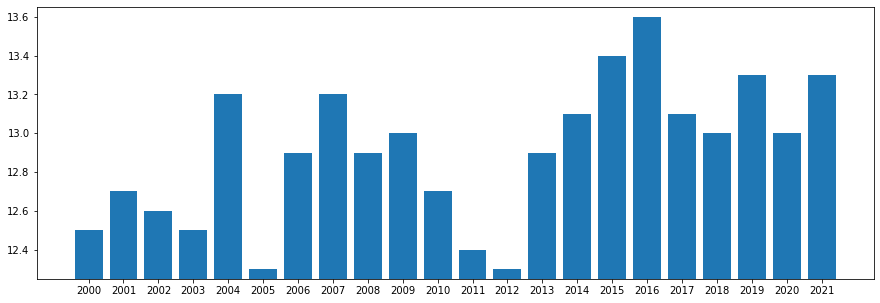

In [181]:
temperature["전국(평균)"]=temperature["전국(평균)"].astype("str")
temperature["전국(평균)"]=temperature["전국(평균)"].astype("float")
plt.figure(figsize=(15, 5)) 
plt.ylim([12.25, 13.65]) 
plt.bar(temperature.index,temperature["전국(평균)"])